In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('finalDataset.csv')

df

,id,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,7lmeHLHBe4nmXzuXc0HDjk,0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4,1999
1,1wsRitfRRtWyEapl0q22o8,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4,1999
2,1hR0fIFK2qRG3f3RF70pb7,0,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4,1999
3,2lbASgTSoDO7MTuLAXlTW0,1,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4,1999
4,1MQTmpYOZ6fcMQc56Hdo7T,0,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2V7MUfpnYxttoEpP8RORYr,0,0.565,0.762,5,-4.993,1,0.0441,0.28300,0.000003,0.0665,0.354,145.069,268640,4,2008
99994,54Y8hw7tJVhfiMl4fR6HM8,0,0.447,0.815,0,-3.539,1,0.0394,0.02340,0.000590,0.1150,0.417,122.126,194387,4,2008
99995,3onwqb1aDAhOEKk2z54MDz,0,0.610,0.687,1,-8.189,1,0.0321,0.03340,0.003800,0.5080,0.109,128.023,262933,4,2008
99996,15aq0vixWE6bnSV2OleGB0,0,0.601,0.835,8,-4.666,1,0.0374,0.03900,0.000032,0.1180,0.332,144.990,224800,4,2008


In [3]:
# Remove any rows with missing or invalid values
df.dropna(inplace=True)

# Select a subset of columns to use in the clustering process
columns_to_use = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year']
df = df[columns_to_use]

# Normalize the values of each column
df = (df - df.mean()) / df.std()
df

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,-0.229248,-0.113197,1.506690,0.494970,0.910353,0.689692,-0.094713,-1.005684,-0.756072,0.780865,0.255325,-0.014599,-0.265681,-0.465551
1,4.362046,0.577832,1.434903,1.626209,0.855025,0.689692,0.851244,-1.040438,-0.755912,-0.283706,0.203125,-0.475466,-0.291319,-0.465551
2,-0.229248,-0.943503,1.479342,0.494970,0.906564,0.689692,3.271515,-1.012793,-0.756096,-0.458486,-0.240572,1.016992,0.312901,-0.465551
3,4.362046,-0.273901,1.469087,1.626209,0.845021,-1.449907,1.253255,-0.645247,-0.756091,-0.463782,0.520052,-0.699907,-0.242821,-0.465551
4,-0.229248,-0.348897,1.339189,-0.919080,0.708748,0.689692,-0.116044,-1.070136,-0.475252,-0.686760,0.389553,0.281923,-0.295230,-0.465551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,-0.229248,0.395701,0.768318,-0.070650,0.971896,0.689692,-0.329356,-0.329305,-0.756092,-0.752435,-0.300228,0.865378,0.115697,0.516542
99994,-0.229248,-0.236403,0.949493,-1.484700,1.192297,0.689692,-0.367917,-1.012793,-0.754523,-0.495561,-0.065330,0.122113,-0.368322,0.516542
99995,-0.229248,0.636757,0.511939,-1.201890,0.487438,0.689692,-0.427808,-0.986464,-0.745937,1.585914,-1.213723,0.313153,0.078496,0.516542
99996,-0.229248,0.588546,1.017860,0.777780,1.021463,0.689692,-0.384325,-0.971720,-0.756016,-0.479671,-0.382257,0.862818,-0.170074,0.516542


In [4]:
# Initialize an empty list to store the sum of squared distances for each number of clusters
sse = [] 

# Fit the KMeans model to the data with a range of different numbers of clusters
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df)
    sse.append(kmeans.inertia_)  # Add the sum of squared distances for the current number of clusters to the list

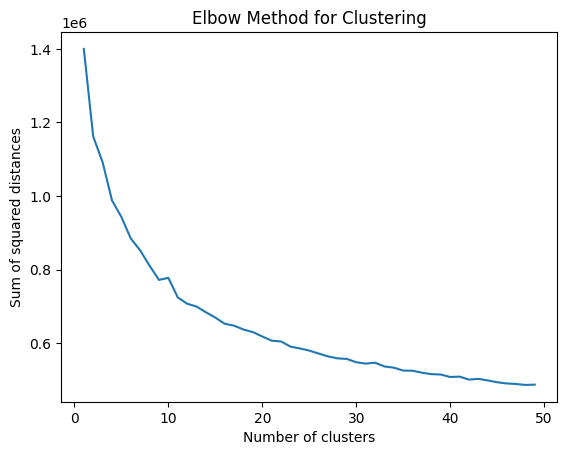

In [5]:
# Plot the sum squared distances for each number of clusters for elbow method

plt.plot(range(1, 50), sse)
plt.title('Elbow Method for Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

### Fit the clustering model to the preprocessed data

In [6]:
# Initialize the KMeans model with 8 clusters
kmeans = KMeans(n_clusters=20, n_init='auto', random_state=1)

# Fit the model to the data
kmeans.fit(df)  

KMeans(n_clusters=20, random_state=1)

In [7]:
# Generate cluster assignments for each data point
clusters = kmeans.predict(df)

# Print the cluster assignments for the first few data points
print(clusters[:10])

[ 9 18 11  3  9  9  0 16  0  0]


# Evaluate the quality of the generated clusters

In [8]:
# Calculate the silhouette score for the generated clusters
silhouette_score(df, clusters)

0.10737202112621363